In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate Dataset

In [2]:
and_data = [
    {'x1': 0, 'x2': 0, 'y': 0},
    {'x1': 0, 'x2': 1, 'y': 0},
    {'x1': 1, 'x2': 0, 'y': 0},
    {'x1': 1, 'x2': 1, 'y': 1}
]
and_data = pd.DataFrame(and_data)
and_data

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [3]:
or_data = [
    {'x1': 0, 'x2': 0, 'y': 0},
    {'x1': 0, 'x2': 1, 'y': 1},
    {'x1': 1, 'x2': 0, 'y': 1},
    {'x1': 1, 'x2': 1, 'y': 1}
]
or_data = pd.DataFrame(or_data)
or_data

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [4]:
xor_data = [
    {'x1': 0, 'x2': 0, 'y': 0},
    {'x1': 0, 'x2': 1, 'y': 1},
    {'x1': 1, 'x2': 0, 'y': 1},
    {'x1': 1, 'x2': 1, 'y': 0}
]
xor_data = pd.DataFrame(xor_data)
xor_data

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


# Define Sigmoid

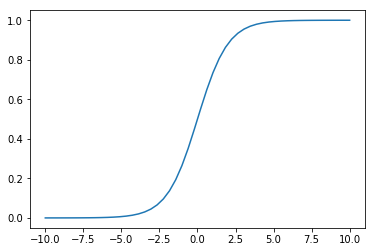

In [5]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-10.0, stop=10.0)
yy = sigmoid(xx)

plt.plot(xx, yy)

# Gradient Descent - AND

In [6]:
data = and_data.copy()

x1 = data['x1'].values
x2 = data['x2'].values
y = data['y'].values

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

In [7]:
num_epoch = 100

for epoch in range(num_epoch):
    y_predict = (x1 * w1) + (x2 * w2) + b
    y_predict = sigmoid(y_predict)
    
    predict = 0.5 < y_predict
    error = (predict != y).mean()
    if error == 0:
        break
    
    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
    b = b - (y_predict - y).mean()

print("{0} error = {1:.5f}".format(epoch, error))

16 error = 0.00000


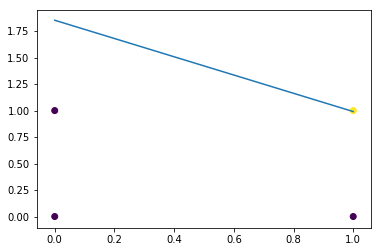

In [8]:
xx = np.linspace(start=0.0, stop=1.0)
yy = -1.0 * (w1 * xx + b) / w2

plt.plot(xx, yy)
plt.scatter(x1, x2, c=y)

# Gradient Descent - OR

In [9]:
data = or_data.copy()

x1 = data['x1'].values
x2 = data['x2'].values
y = data['y'].values

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

In [10]:
num_epoch = 100
learning_rate = 0.01

for epoch in range(num_epoch):
    y_predict = (x1 * w1) + (x2 * w2) + b
    y_predict = sigmoid(y_predict)
    
    predict = 0.5 < y_predict
    error = (predict != y).mean()
    if error == 0:
        break
    
    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
    b = b - (y_predict - y).mean()

print("{0} error = {1:.5f}".format(epoch, error))

15 error = 0.00000


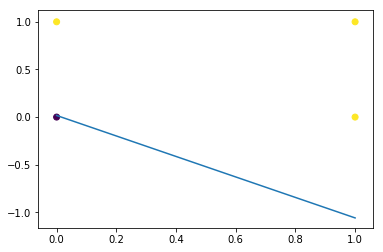

In [11]:
xx = np.linspace(start=0.0, stop=1.0)
yy = -1.0 * (w1 * xx + b) / w2

plt.plot(xx, yy)
plt.scatter(x1, x2, c=y)

# Gradient Descent - XOR

In [12]:
data = xor_data.copy()

x1 = data['x1'].values
x2 = data['x2'].values
y = data['y'].values

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

In [13]:
num_epoch = 100

for epoch in range(num_epoch):
    y_predict = (x1 * w1) + (x2 * w2) + b
    y_predict = sigmoid(y_predict)
    
    predict = 0.5 < y_predict
    error = (predict != y).mean()
    if error == 0:
        break
    
    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
    b = b - (y_predict - y).mean()

print("{0} error = {1:.5f}".format(epoch, error))

99 error = 0.75000


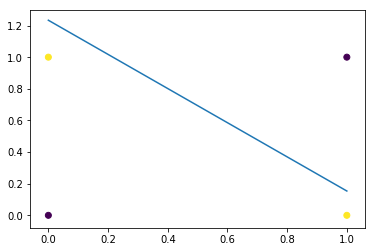

In [14]:
xx = np.linspace(start=0.0, stop=1.0)
yy = -1.0 * (w1 * xx + b) / w2

plt.plot(xx, yy)
plt.scatter(x1, x2, c=y)

# Gradient Descent - XOR2

In [15]:
data = xor_data.copy()

data['AND(x1^, x2)'] = (data['x1'] == 0).astype('int') & data['x2']
data['AND(x1, x2^)'] = data['x1'] & (data['x2'] == 0).astype('int')

data

,x1,x2,y,"AND(x1^, x2)","AND(x1, x2^)"
0,0,0,0,0,0
1,0,1,1,1,0
2,1,0,1,0,1
3,1,1,0,0,0


In [16]:
x1 = data['AND(x1^, x2)'].values
x2 = data['AND(x1, x2^)'].values
y = data['y'].values

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

In [17]:
num_epoch = 100

for epoch in range(num_epoch):
    y_predict = (x1 * w1) + (x2 * w2) + b
    y_predict = sigmoid(y_predict)
    
    predict = 0.5 < y_predict
    error = (predict != y).mean()
    if error == 0:
        break
    
    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
    b = b - (y_predict - y).mean()

print("{0} error = {1:.5f}".format(epoch, error))

4 error = 0.00000


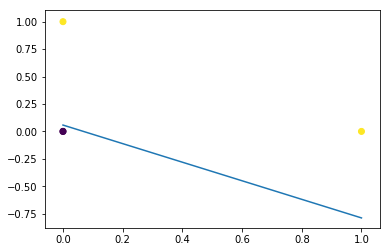

In [18]:
xx = np.linspace(start=0.0, stop=1.0)
yy = -1.0 * (w1 * xx + b) / w2

plt.plot(xx, yy)
plt.scatter(x1, x2, c=y)

# Polynormial Neural Network

In [19]:
data = xor_data.copy()

data["x1*x1"] = data["x1"] * data['x1']
data["x1*x2"] = data["x1"] * data['x2']
data["x2*x2"] = data["x2"] * data['x2']

data

,x1,x2,y,x1*x1,x1*x2,x2*x2
0,0,0,0,0,0,0
1,0,1,1,0,0,1
2,1,0,1,1,0,0
3,1,1,0,1,1,1


In [20]:
x1 = data['x1'].values
x2 = data['x2'].values
x3 = data['x1*x1'].values
x4 = data['x1*x2'].values
x5 = data['x2*x2'].values
y = data['y'].values

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
w3 = np.random.uniform(low=0.0, high=1.0)
w4 = np.random.uniform(low=0.0, high=1.0)
w5 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

In [21]:
num_epoch = 100

for epoch in range(num_epoch):
    y_predict = (x1 * w1) + (x2 * w2) + (x3 * w3) + (x4 * w4) + (x5 * w5) + b
    y_predict = sigmoid(y_predict)
    
    predict = 0.5 < y_predict
    error = (predict != y).mean()
    if error == 0:
        break
    
    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
    w3 = w3 - ((y_predict - y) * x3).mean()
    w4 = w4 - ((y_predict - y) * x4).mean()
    w5 = w5 - ((y_predict - y) * x5).mean()
    b = b - (y_predict - y).mean()

print("{0} error = {1:.5f}".format(epoch, error))

4 error = 0.00000


# Multi-layer NN

In [74]:
data = xor_data.copy()
data

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [75]:
X = data[['x1', 'x2']].values
y = data['y'].values
y = y.reshape(4, 1)

In [76]:
w1 = np.random.uniform(low=0.0, high=1.0, size=(2,3))
w2 = np.random.uniform(low=0.0, high=1.0, size=(3,1))

num_epoch = 300

for epoch in range(num_epoch):
    # Forwardpropagation
    z1 = X.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    
    predict = 0.5 < a2
    error = (predict != y).mean()
    
    if error == 0:
        break
    
    # Backpropergation
    d2 = a2 - y
    d1 = d2.dot(w2.T) * a1 * (1 - a1)
    
    w2 = w2 - a1.T.dot(d2)
    w1 = w1 - X.T.dot(d1)
    
print("{0} error = {1:.5f}".format(epoch, error))

73 error = 0.00000
